### Semana 4: Sistema de ecuaciones lineales

In [92]:
import pandas as pd
import numpy as np
from IPython.display import Image

1. El sistema de ecuaciones para hallar los valores de los parámetros es el que se muestra

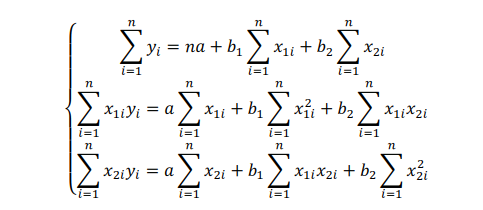

In [93]:
Image('ecuacion.png')

\begin{equation}
\begin{aligned}
\sum_{i=1}^n {yi} &= n a + b_1 \sum_{j=1}^n x_{1i} + b_2 \sum_{j=1}^n x_{2i}\\
\sum_{i=1}^n x_{1i} y_i &= a \sum_{i=1}^n x_{1i} + b_1 \sum_{i=1}^n x_{1i}^2 + b_2 \sum_{i=1}^n x_{1i} x_{2i} \\
\sum_{i=1}^n x_{2i} y_i &= a \sum_{i=1}^n x_{2i} + b_1 \sum_{i=1}^n x_{1i}x_{2i} + b_2 \sum_{i=1}^n x_{2i}^2
\end{aligned}
\end{equation}


2. Lea la base de datos

In [94]:
data = pd.read_csv("publicidad.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


3. Elimine la variable ‘Newspaper’

In [95]:
data = data.drop(['Newspaper'], axis=1)
data

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,9.7
197,177.0,9.3,12.8
198,283.6,42.0,25.5


\begin{equation}
\begin{aligned}
\mathbf{A} \mathbf{x} &= \mathbf{b} \\
\begin{pmatrix}
n & \sum_{j=1}^n x_{1i} & \sum_{j=1}^n x_{2i} \\[10pt]
\sum_{i=1}^n x_{1i} & \sum_{i=1}^n x_{1i}^2 & \sum_{i=1}^n x_{1i} x_{2i} \\[10pt]
\sum_{i=1}^n x_{2i} & \sum_{i=1}^n x_{1i}x_{2i} & \sum_{i=1}^n x_{2i}^2 \\[10pt]
\end{pmatrix}
\begin{pmatrix}
a \\[10pt]
b_1 \\[10pt]
b_2 \\[10pt]
\end{pmatrix} &=
\begin{pmatrix}
\sum_{i=1}^n {yi} \\[10pt]
\sum_{i=1}^n x_{1i} y_i \\[10pt]
\sum_{i=1}^n x_{2i} y_i \\[10pt]
\end{pmatrix}
\end{aligned}
\end{equation}

\begin{equation} 
\mathbf{A} = 
\begin{pmatrix}
200 & 29408.5 & 4652.8 \\[10pt]
29408.5 & 152108 & 698062 \\[10pt]
4652.8 & 698062 & 152108 \\[10pt]
\end{pmatrix}
\mathbf{b} = 
\begin{pmatrix}
2804.5 \\[10pt]
482108 \\[10pt]
74126.4 \\[10pt]
\end{pmatrix}
\end{equation}

4.  Calcule todas las sumatorias del sistema de ecuaciones

In [96]:
n = len(data)
sum_x1 = sum(data['TV'])
sum_x2 = sum(data['Radio'])
sum_y = sum(data['Sales'])
sum_x1_cuadrado = sum(data['TV'] ** 2)
sum_x1x2 = sum(data['TV'] * data['Radio'])
sum_x1y = sum(data['TV'] * data['Sales'])
sum_x2_cuadrado = sum(data['Radio'] ** 2)
sum_x2y = sum(data['Radio'] * data['Sales'])

from tabulate import tabulate
iterables = ["n","sum_x1", "sum_x2", "sum_y", "sum_x1_cuadrado", "sum_x1x2", "sum_x1y", "sum_x2_cuadrado", "sum_x2y"]
iteradores = [n, sum_x1, sum_x2, sum_y, sum_x1_cuadrado, sum_x1x2, sum_x1y, sum_x2_cuadrado, sum_x2y]

print(tabulate({"COEFICIENTES": iterables, "VALORES": iteradores}, headers=["COEFICIENTES Y TERMINOS INDP.", "VALORES"], tablefmt="presto", numalign="left"))


 COEFICIENTES Y TERMINOS INDP.   | VALORES
---------------------------------+-------------
 n                               | 200
 sum_x1                          | 29408.5
 sum_x2                          | 4652.8
 sum_y                           | 2804.5
 sum_x1_cuadrado                 | 5.79112e+06
 sum_x1x2                        | 698062
 sum_x1y                         | 482108
 sum_x2_cuadrado                 | 152108
 sum_x2y                         | 74126.4


5. Imprima la matriz de coeficientes **A** y la matriz de términos independientes **b**

\begin{equation} 
\mathbf{b} = 
\begin{pmatrix}
2804.5 \\[10pt]
482108 \\[10pt]
74126.4 \\[10pt]
\end{pmatrix}

\mathbf{A} = 
\begin{pmatrix}
200 & 29408.5 & 4652.8 \\[10pt]
29408.5 & 152108 & 698062 \\[10pt]
4652.8 & 698062 & 152108 \\[10pt]
\end{pmatrix}
\end{equation}


In [99]:
A = np.array([(n, sum_x1, sum_x2),(sum_x1, sum_x1_cuadrado, sum_x1x2),(sum_x2, sum_x1x2, sum_x2_cuadrado)])
b = np.array([(sum_y),(sum_x1y), (sum_x2y)])
print('\nMatriz de coeficientes: {}'.format(A))
print('\nMatriz independiente: {}'.format(b))



Matriz de coeficientes: [[2.00000000e+02 2.94085000e+04 4.65280000e+03]
 [2.94085000e+04 5.79111839e+06 6.98061980e+05]
 [4.65280000e+03 6.98061980e+05 1.52107860e+05]]

Matriz independiente: [  2804.5  482108.34  74126.39]


6. Confirmamos la existencia de la inversa de la matriz A calculando su determinante

In [100]:
detA = np.linalg.det(A)
detA

12829782120021.764

7. Aplique  el  método  de  la  inversa  para  resolver  dicho  sistema

In [101]:
invA = np.linalg.inv(A)
solucion = np.dot(invA, b.T)
solucion

array([2.92109991, 0.04575482, 0.18799423])

\begin{equation}
\begin{aligned}
\mathbf{y} &= \mathbf{2.92109991} - \mathbf{0.04575482}\mathbf{x_{1}} + \mathbf{0.18799423}\mathbf{x_{2}}
\end{aligned}
\end{equation}


8. Verifique que se obtienen los mismos  resultados  al  utilizar  la función ```LinearRegressión``` de la librería ```sklearn```.

In [79]:
from sklearn.linear_model import LinearRegression

X = data[['TV', 'Radio']]
Y = data['Sales']
rls = LinearRegression()
rls.fit(X,Y)

LinearRegression()

In [114]:
coef1 = pd.DataFrame(rls.coef_, ["Pendiente 1", "Pendiente 2"], columns=["Coeficientes"])
coef2 = pd.DataFrame(rls.intercept_,["Intercepto"],columns=["Coeficientes"])
coeficientes = pd.concat([coef1, coef2], axis=0)
coeficientes


,Coeficientes
Pendiente 1,0.045755
Pendiente 2,0.187994
Intercepto,2.921100
